# Математическая статистика
## Практическое задание 4

В данном задании предлагается провести некоторое исследование доверительных интервалов и байесовких методов.

**Правила:**

* Выполненную работу нужно отправить на почту `probability.diht@yandex.ru`, указав тему письма `"[номер группы] Фамилия Имя - Задание 4"`. Квадратные скобки обязательны. Вместо `Фамилия Имя` нужно подставить свои фамилию и имя.
* Прислать нужно ноутбук и его pdf-версию. Названия файлов должны быть такими: `4.N.ipynb` и `4.N.pdf`, где `N` - ваш номер из таблицы с оценками.
* Никакой код из данного задания при проверке запускаться не будет.
* Некоторые задачи отмечены символом <font size="5" color="red">\*</font>. Эти задачи являются дополнительными. Успешное выполнение большей части таких задач (за все задания) является необходимым условием получения бонусного балла за практическую часть курса.
* Баллы за каждую задачу указаны далее. Если сумма баллов за задание меньше 25% (без учета доп. задач), то все задание оценивается в 0 баллов.


**Баллы за задание:**

* **Задача 1 - 5 баллов**
* **Задача 2<font size="5" color="red">\*</font> - 3 балла**
* **Задача 3<font size="5" color="red">\*</font> - 3 балла**
* **Задача 4 - 5 баллов**
* **Задача 5<font size="5" color="red">\*</font> - 2 балла**
* **Задача 6 - 4 балла**
* **Задача 7 - 1 балл**
* **Задача 8 - 3 балла**
* Задача 9<font size="5" color="red">\*</font> - 5 баллов
* **Задача 10 - 5 баллов**
* Задача 11<font size="5" color="red">\*</font> - 3 балла

In [245]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt

from statsmodels.distributions.empirical_distribution import ECDF
from statsmodels.nonparametric.kde import KDEUnivariate

import pandas as pd
from numpy.linalg import inv
%matplotlib inline

### 1. Доверительные интервалы

**Задача 1.** В этой задаче нужно визуализировать доверительные интервалы для выборок из различных распределений. Чтобы не плодить код, напишите следующую функцию. Пример построения есть в ячейке №22 ноутбука `python_6`.

In [220]:
def draw_confidence_interval(left,  # левая граница интервала (МБ всё-таки нижняя?)
                             right,  # правая граница интервала
                             estimation=None,  # если задана, то рисуется график оценки
                             sample=None,  # если задано, то рисуются точки выборки
                             ylim=None,  # ограничение по оси y
                             title=None,
                             show=True,
                             CI_color="green",
                             CI_label="Confidence interval"):  
    
    grid = np.arange(1, left.size + 1) # time from python_6
    if show:
        plt.figure(figsize = (14, 7))
    
    if not (estimation is None):
        plt.plot(grid, estimation, color="red", label="Estimation")
    if not (sample is None):
        plt.scatter(grid, sample, alpha=0.5, label="Sample values")
    if not (ylim is None):
        plt.ylim(ylim)
    if not (title is None):
        plt.title(title)

    plt.xlabel("Time")
    plt.fill_between(grid, left, right, color=CI_color, alpha=0.3, label=CI_label)
    
    if show:
        plt.legend()
        plt.grid()
        plt.show()

Сгенерируйте выборки и постройте графики доверительных интервалов по следующей схеме.
* Выборка из распределения $\mathcal{N}(0, 1)$; точный доверительный интервал минимальной длины в модели $\mathcal{N}(\theta, 1)$; нужно нанести на график точки выборки.
* Выборка из распределения $U[0, 1]$; точный доверительный интервал минимальной длины в модели $U[0, \theta]$ на основе статистики $X_{(n)}$; нужно нанести на график точки выборки.
* Выборка из распределения $\Gamma(3, 2)$; точный асимптотический доверительный интервал в модели $\Gamma(\theta, 2)$; точки выборки наносить на график не нужно.
* Выборка из стандартного распределения Коши; точный асимптотический доверительный интервал в модели распределения Коши со сдвигом; нужно нанести на график точки выборки.
* Выборка из стандартного распределения Коши; точный доверительный интервал минимальной длины в модели $\mathcal{N}(\theta, 1)$; нужно нанести на график точки выборки.


Генерировать выборки размера 100, уровень доверия брать $\alpha=0.95$. Для вычисления квантилей у каждого распределения из `scipy.stats` есть функция `ppf`.

Сделайте вывод. Насколько часто истинное значение параметра попадает в доверительный интервал? Как длина интервала зависит от размера выборки?

In [221]:
SAMPLE_SIZE = 100
ALPHA = 0.95

** Первый пункт **: Выборка из распределения $\mathcal{N}(0, 1)$; точный доверительный интервал минимальной длины в модели $\mathcal{N}(\theta, 1)$; нужно нанести на график точки выборки.


$\forall{i}: X_i \sim \mathcal{N}(\theta, 1) \Rightarrow \frac{\sum\limits_{i=1}^{n}{X_i}}{n} = \overline{X} = \mathcal{N}(\theta, \frac{1}{n}) \Rightarrow \sqrt{n} (\overline{X} - \theta) \sim \mathcal{N}(\theta - \theta, \frac{1}{n} {\sqrt{n}}^2) \equiv \mathcal{N}(0, 1)$ 

Получим доверительный интервал CI уровня $\alpha$ для оценки $\overline{X}$с помощью квантилей (здесь и далее - $z_{\phi}$):

$\mathcal{P}(z_{\frac{1 - \alpha}{2}} \leq
            \sqrt{n} (\overline{X} - \theta) \leq
            z_{\frac{1 + \alpha}{2}} ) = \alpha  \Rightarrow$
$CI = (\overline{X} - z_{\frac{1 + \alpha}{2}} \frac{1}{\sqrt{n}},
       \overline{X} - z_{\frac{1 - \alpha}{2}} \frac{1}{\sqrt{n}})
    = (\overline{X} - z_{\frac{1 + \alpha}{2}} \frac{1}{\sqrt{n}},
       \overline{X} + z_{\frac{1 + \alpha}{2}} \frac{1}{\sqrt{n}})$

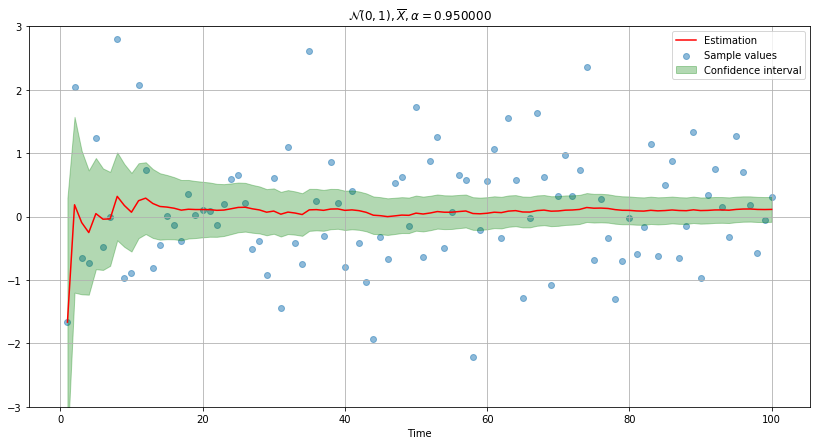

In [222]:
X = sps.norm.rvs(size=SAMPLE_SIZE)
X_means = X.cumsum() / (np.arange(1, X.size + 1))

z = sps.norm.ppf((1. + ALPHA) / 2.) # квантили

left = X_means - z / np.sqrt(np.arange(1, X.size + 1))
right = X_means + z / np.sqrt(np.arange(1, X.size + 1))

draw_confidence_interval(left, right, estimation=X_means,
                         sample=X, ylim = (-3,3),
                         title=r"$\mathcal{N}(0,1), \overline{X}, \alpha = %f$" % (ALPHA))

** Второй пункт **: Выборка из распределения $U[0, 1]$; точный доверительный интервал минимальной длины в модели $U[0, \theta]$ на основе статистики $X_{(n)}$; нужно нанести на график точки выборки.

$\forall {i} : X_i \sim U[0, \theta] \Rightarrow \frac{X_i}{\theta} \sim U[0, 1]$

$\forall (l, r \in [0,1], l < r) : \mathcal{P}(l < \frac{X_{(n)}}{\theta} < r) =
\mathcal{P}(\frac{X_{(n)}}{r} < \theta < \frac{X_{(n)}}{l}) =
\frac{1}{l} - \frac{1}{r} = \frac{r - l}{rl}$

$\int_{l}^{1}nx^{n-1} dx = 1 - l^n = \alpha \Rightarrow l = \sqrt[n]{1 - \alpha}$
На  $(0,1]$ плотность $nx^{n-1}$ величины $\frac{X_{(n)}}{\theta}$ ненулевая и нестрого растёт.
Получаем, что при (l, r) = (l, 1) длина доверительного интервала
$CI = (X_{(n)}, \frac{X_{(n)}}{\sqrt[n]{1 - \alpha}}) $ минимальна

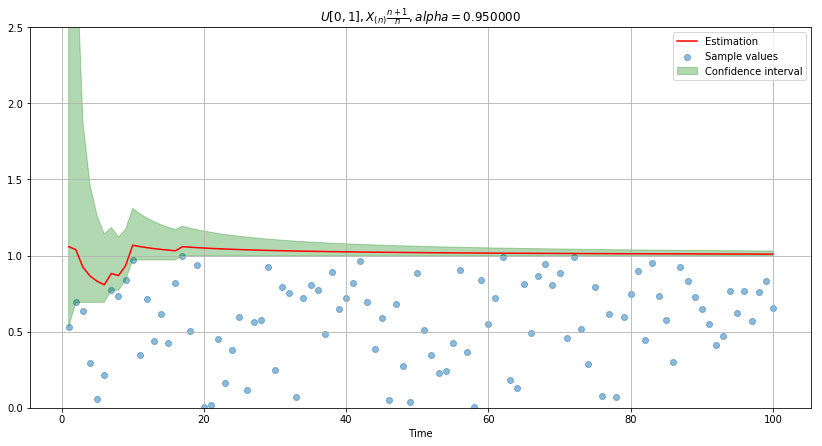

In [223]:
X = sps.uniform.rvs(size=SAMPLE_SIZE)
X_max = np.maximum.accumulate(X)

estimations = X_max * np.arange(2, 2 + X.size) / np.arange(1, 1 + X.size)
left = X_max

koeffs = np.array([(1. - ALPHA) ** (-1. / n) for n in range(1, 1 + X.size)])
right = X_max * koeffs

draw_confidence_interval(left, right, estimation=estimations,
                          sample=X, ylim=(0, 2.5),
                          title = r"$U[0,1], X_{(n)} \frac{n+1}{n}, alpha = %f$" % (ALPHA))

** Третий пункт **: Выборка из распределения $\Gamma(3, 2)$; точный **асимптотический** доверительный интервал в модели $\Gamma(\theta, 2)$; точки выборки наносить на график не нужно.

Применяя центральную предельную теорему, получим:
$\forall i : X_i \sim \Gamma(\theta, 2)$
$\Rightarrow \sqrt{n} (\overline{X} - \frac{2}{\theta}) \overset{d}{\rightarrow} \mathcal{N}(0, \frac{2}{\theta^2}) \Rightarrow
\sqrt{\frac{\theta^2}{2}} \sqrt{n} (\overline{X} - \frac{2}{\theta})  \overset{d}{\rightarrow} \mathcal{N}(0, 1)$  

$\theta\sqrt{\frac{n}{2}} (\overline{X} - \frac{2}{\theta}) \in (l, r) \Rightarrow
\theta \in (\frac{l\sqrt{\frac{2}{n}} + 2}{\overline{X}}, 
            \frac{r\sqrt{\frac{2}{n}} + 2}{\overline{X}})$
            
Выбирая $l = z_{\frac{1-\alpha}{2}}, r = z_{\frac{1+\alpha}{2}}, l = - r$, получим доверительные интервалы для $\theta$ уровня доверия $\alpha$
            
!В питоне гамма-распределение отличное от того, что было на лекциях

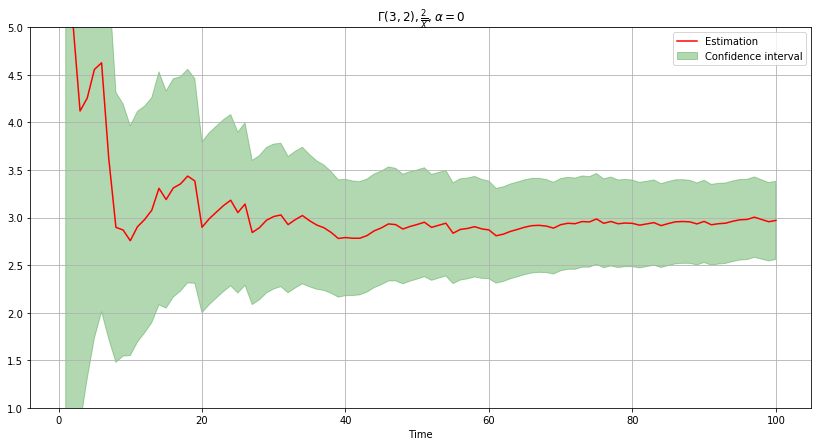

In [224]:
def plot(SAMPLE_SIZE):
    X = sps.gamma(a=2., scale = 1./3.).rvs(size=SAMPLE_SIZE)
    z = sps.norm.ppf((1. + ALPHA) / 2.)

    X_mean = X.cumsum() / np.arange(1, 1 + X.size)
    estimation = 2. / X_mean
    left = (2. - z * np.sqrt(2./np.arange(1, 1 + X.size))) / X_mean
    right = (2. + z * np.sqrt(2./np.arange(1, 1 + X.size))) / X_mean

    draw_confidence_interval(left, right, estimation=estimation, ylim=(1,5),
                             title=r"$\Gamma(3,2), \frac{2}{\overline{X}}, \alpha=%d$"%(ALPHA))
plot(SAMPLE_SIZE)

Интервал-таки ассимптотический, посмотрим для большего SAMPLE_SIZE. Кстати, используемая здесь оценка несмещена, например, а не просто середина.

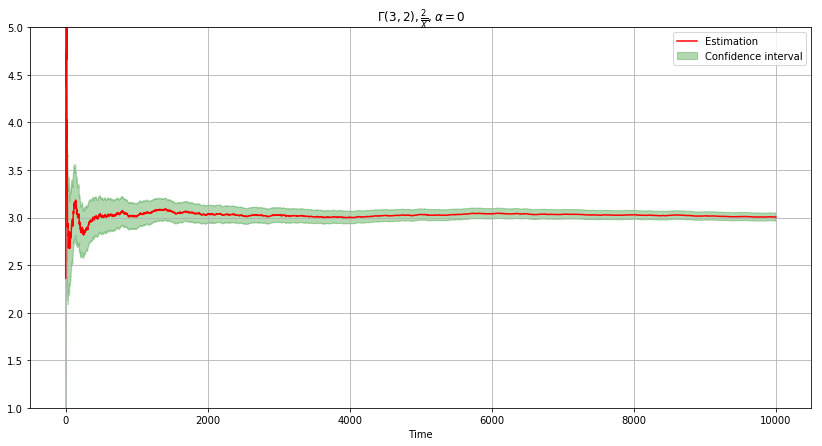

In [225]:
plot(100*SAMPLE_SIZE)

** Четвёртый пункт **: Выборка из стандартного распределения Коши; точный асимптотический доверительный интервал в модели распределения Коши со сдвигом; нужно нанести на график точки выборки.

$\forall i : X_i \sim Cauchy(\theta, 1)$ Известно, что выборочная медиана $\mu^*$ асимптотически нормальна с ас. матожиданием $\theta$ и ас. дисперсией $\frac{\pi^2}{4}$ (это было на семинаре, как и получение интервала)
$\Rightarrow \sqrt{n}(\mu^* - \theta) \overset{d}{\rightarrow} \mathcal{N}(0, \frac{\pi^2}{4})$
$\Rightarrow \frac{2}{\pi} \sqrt{n}(\mu^* - \theta) \overset{d}{\rightarrow} \mathcal{N}(0, 1) $

$\frac{2}{\pi} \sqrt{n}(\mu^* - \theta) \in (l, r) \Rightarrow
\theta \in (\mu^* - r \frac{\pi}{2\sqrt{n}}, \mu^* - l \frac{\pi}{2\sqrt{n}})$

Значит, выбирая $l = z_{\frac{1 - \alpha}{2}}, r = z_{\frac{1 + \alpha}{2}}$ - квантили нормального распределения, получаем асимптотический доверительный интервал для $\theta$ уровня доверия $\alpha$

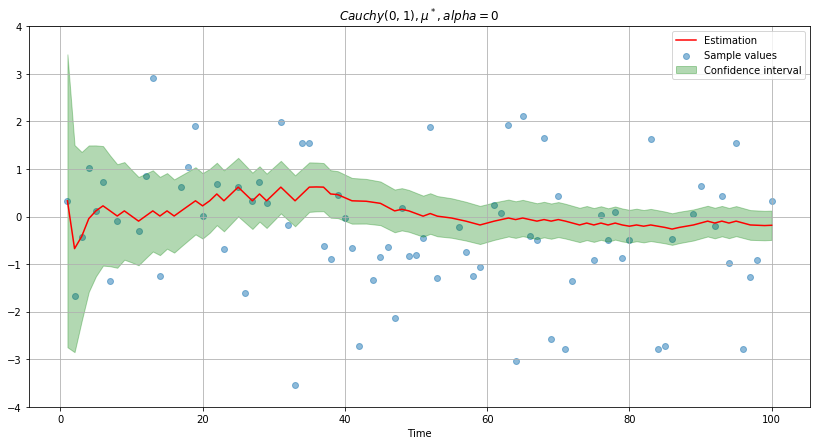

In [226]:
def plot(SAMPLE_SIZE):
    X = sps.cauchy.rvs(size=SAMPLE_SIZE)
    z = sps.norm.ppf((1. + ALPHA) / 2.) # = r
    X_cummedian = np.array([np.median(X[:(1 + k)]) for k in range(X.size)])
  
    koeff = np.pi / (2. * np.sqrt(np.arange(1, X.size + 1)))
    left = X_cummedian - z * koeff
    right = X_cummedian + z * koeff # l = -r

    draw_confidence_interval(left, right, estimation=X_cummedian,
                             sample=X, ylim=(-4, +4),
                             title=r"$Cauchy(0, 1), \mu^*, alpha=%d$"%(ALPHA))
plot(SAMPLE_SIZE)

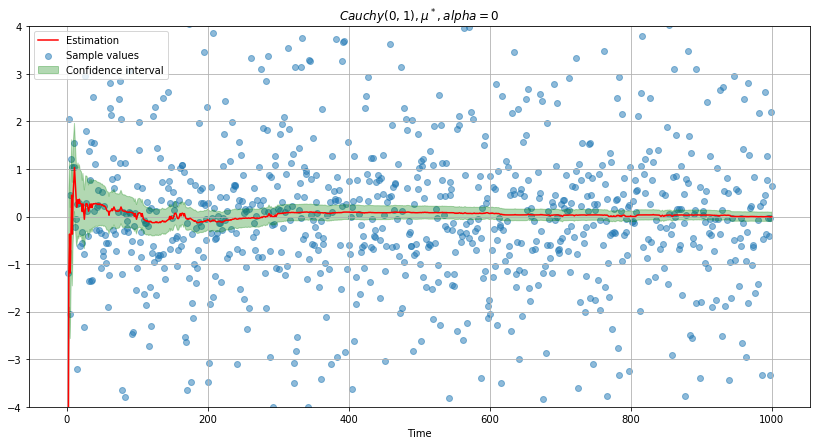

In [227]:
plot(10*SAMPLE_SIZE)

** Пятый пункт **: Выборка из стандартного распределения Коши; точный доверительный интервал минимальной длины в модели $\mathcal{N}(\theta, 1)$; нужно нанести на график точки выборки.

Интервал найден в первом пункте

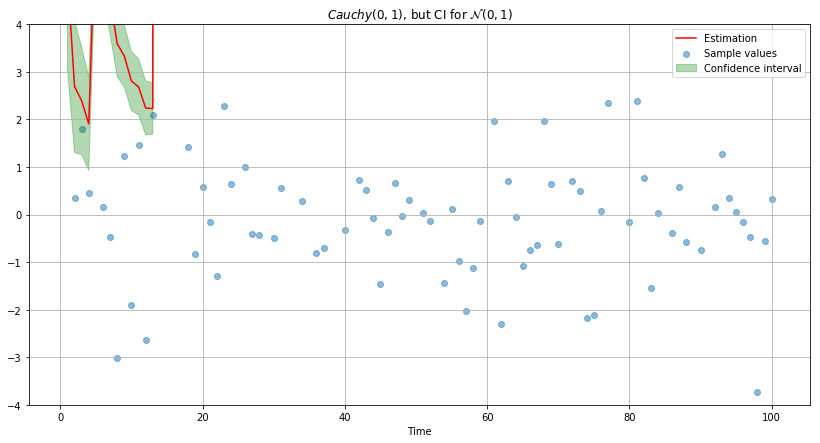

In [228]:
def plot(SAMPLE_SIZE):
    X = sps.cauchy.rvs(size=SAMPLE_SIZE)
    X_means = X.cumsum() / (np.arange(1, X.size + 1))

    z = sps.norm.ppf((1. + ALPHA) / 2.) # квантили

    left = X_means - z / np.sqrt(np.arange(1, X.size + 1))
    right = X_means + z / np.sqrt(np.arange(1, X.size + 1))

    draw_confidence_interval(left, right, estimation=X_means,
                             sample=X, ylim=(-4, 4),
                            title=r"$Cauchy(0,1)$, but CI for $\mathcal{N}(0,1)$")
plot(SAMPLE_SIZE)

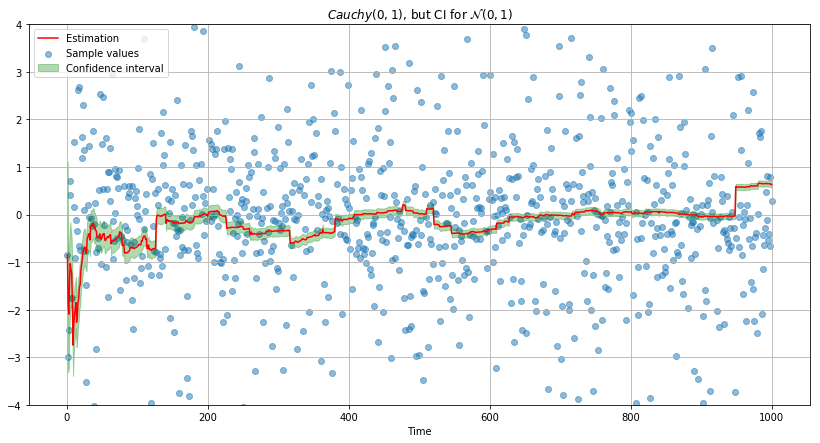

In [229]:
plot(10*SAMPLE_SIZE)

**Вывод:** Доверительные интервалы проиллюстрированы, т.е. видно, что для интервалов с высоким уровнем доверия оцениваемое значение часто (на примерах выше - почти всегда) лежит в допустимом интервале, однако для ассимптотических интервалов для этого требуется достаточно большая выборка (в идеале - бесконечная). 

Более того, для всех интервалов выше, их длина стремится к нулю при стремлении размера выборки к бесконечности, т.е. эти интервалы хороши в том смысле, что увеличивая размер выборки, мы будем уменьшать разброс (без изменения уровня доверия, однако).

Отдельно отметим пятый пункт: делать оценки по величинам из одного множества распределений, используя интервал для другого множества, которое не включает в себя первое - достаточно бесполезное занятие. 

**Задача 2<font size="5" color="red">\*</font>.** 
Аналогично заданию 1 постройте доверительные интервалы для следующих случаев
* Выборка из распределения $\Gamma(3, 2)$; точный асимптотический доверительный интервал для $\theta$ в модели $\Gamma(\theta, \beta)$, причем $\beta$ неизвестно; точки выборки наносить на график не нужно. Сравните с интервалом для случая известного $\beta$.
* Выборка из распределения $\Gamma(3, 2)$; точный асимптотический доверительный интервал для $\beta$ в модели $\Gamma(\theta, \beta)$, причем $\theta$ неизвестно; точки выборки наносить на график не нужно.

_____________
* Выборка из распределения $\Gamma(3, 2)$; точный асимптотический доверительный интервал для $\theta$ в модели $\Gamma(\theta, \beta)$, причем $\beta$ неизвестно; точки выборки наносить на график не нужно. Сравните с интервалом для случая известного $\beta$.

Многомерная ЦПТ:
$((\overline{X}, \overline{X^2})^T - (\frac{\beta}{\theta}, {\frac{\beta(\beta + 1)}{\theta}})^T
\sim \mathcal{N}(0, \Sigma)$

$\Rightarrow \Sigma = ((\frac{\beta}{\theta^2}, \frac{2\beta(\beta + 1)}{\theta^3})^T,
                       (\frac{2\beta(\beta + 1)}{\theta^3}, \frac{2\beta(\beta + 1)(2\beta + 3)}{\theta^4})^T)$
                    
Применим теорему о наследовании ас. нормальности для функции $h(x, y) = \frac{x}{y - x^2}$,
$grad(h) = (\frac{y+x^2}{(y - x^2)^2}, \frac{-x}{(y - x^2)^2})$

Когда-то по методу моментов были получены оценки $\theta^* = \frac{\overline{X}}{S^2}$ и 
$\beta^* = \frac{\overline{X^2}}{S^2} \Rightarrow$ эти оценки ас. нормальны для $\frac{\beta}{\theta}, \frac{\beta(\beta + 1)}{\theta^2}$ соответственно.

Применяя теорему о наследовании и лемму Слуцкого, получаем, что $h(\overline{X}, \overline{X^2})
= \frac{\overline{X}}{S^2}$ является ассимптотически нормальной оценкой для $\theta = h(\frac{\beta}{\theta}, \frac{\beta(\beta + 1)}{\theta^2})$ c ассимптотической дисперсией: $\sigma^2 = (grad(h)|_{(\overline{X}, \overline{X^2})})^T
                                         \Sigma(\frac{\overline{X}}{S^2}, \frac{\overline{X^2}}{S^2})
                                         (grad(h)|_{(\overline{X}, \overline{X^2})})$

Итог: получим доверительный интервал:
$(\frac{\overline{X}}{S^2} - \sigma z_{\frac{1 + \alpha}{2}} / \sqrt{n},
\frac{\overline{X}}{S^2} +  \sigma z_{\frac{1 + \alpha}{2}} / \sqrt{n}))$


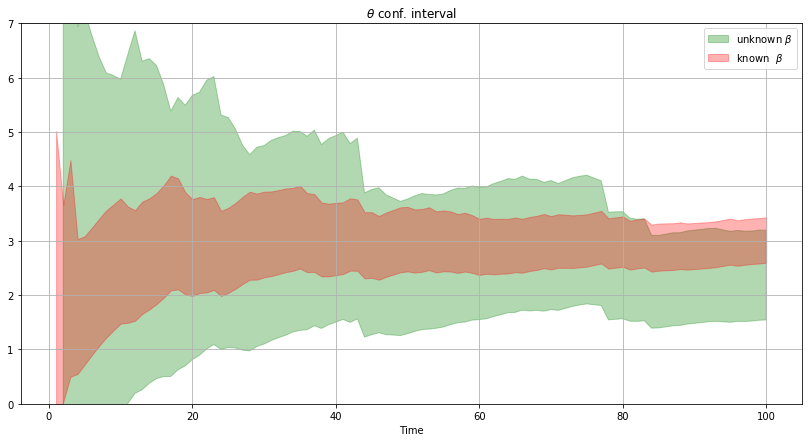

In [244]:
N = 100
ALPHA = 0.95
theta = 3.
beta = 2.
X = sps.gamma(a=beta, scale=1./theta).rvs(size=N)
z = sps.norm.ppf((1. + ALPHA) / 2.)

X_cumsum = X.cumsum()
X_cumsum2 = (X*X).cumsum()
X_cummean = X_cumsum / np.arange(1, X_cumsum.size + 1)
X_cummean2 = X_cumsum2 / np.arange(1, X_cumsum.size + 1)
X_cumS2 = X_cummean2 - (X_cummean**2)

left = np.full(N, np.NAN)
right = np.full(N, np.NAN)

def Sigma(x, y):
    return x * np.sqrt(beta + theta / y)

for i in range(1, N):
    s = Sigma(X_cummean[i] / X_cumS2[i],
              X_cummean2[i] / X_cumS2[i]);
    left[i] = X_cummean[i] / X_cumS2[i] - z * s / np.sqrt(i + 1)
    right[i] = X_cummean[i] / X_cumS2[i] + z * s / np.sqrt(i + 1)
    
left_r = ((-z * np.ones(N) + np.sqrt(np.arange(1, N + 1)) * np.sqrt(2)) 
          * np.sqrt(2) / np.sqrt(np.arange(1, N + 1)) / X_cummean)
right_r = ((+z * np.ones(N) + np.sqrt(np.arange(1, N + 1)) * np.sqrt(2)) 
          * np.sqrt(2) / np.sqrt(np.arange(1, N + 1)) / X_cummean)        

plt.figure(figsize=(14,7))     
plt.ylim((0,7))
draw_confidence_interval(left, right, CI_label=r"unknown $\beta$", CI_color="green",
                         show=False, title=r"$\theta$ conf. interval")
draw_confidence_interval(left_r, right_r, CI_label=r"known  $\beta$", CI_color="red",
                         show=False, title=r"$\theta$ conf. interval")
plt.grid()
plt.legend()
plt.show()

______________
* Выборка из распределения $\Gamma(3, 2)$; точный асимптотический доверительный интервал для $\beta$ в модели $\Gamma(\theta, \beta)$, причем $\theta$ неизвестно; точки выборки наносить на график не нужно.

Второй интервал получим аналогично, используя $h(x, y) = \frac{x^2}{y - x^2}$ Оценка - $\frac{\overline{X}^2}{S^2}$

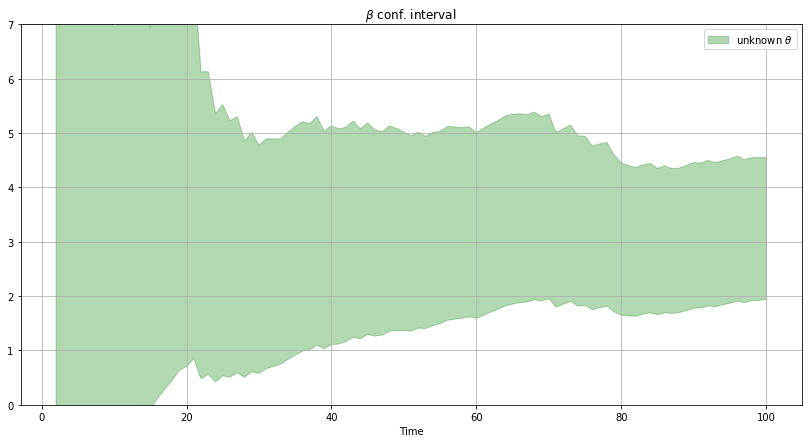

In [243]:
N = 100
ALPHA = 0.95
theta = 3.
beta = 2.
X = sps.gamma(a=beta, scale=1./theta).rvs(size=N)
z = sps.norm.ppf((1. + ALPHA) / 2.)

X_cumsum = X.cumsum()
X_cumsum2 = (X*X).cumsum()
X_cummean = X_cumsum / np.arange(1, X_cumsum.size + 1)
X_cummean2 = X_cumsum2 / np.arange(1, X_cumsum.size + 1)
X_cumS2 = X_cummean2 - (X_cummean**2)

left = np.full(N, np.NAN)
right = np.full(N, np.NAN)

def Sigma2(x, y):
    return np.sqrt(2. * y * (y + 1))

for i in range(1, N):
    s = Sigma2(X_cummean[i] / X_cumS2[i],
              X_cummean2[i] / X_cumS2[i]);
    left[i] = X_cummean[i] ** 2 / X_cumS2[i] - z * s / np.sqrt(i + 1)
    right[i] = X_cummean[i] ** 2 / X_cumS2[i] + z * s / np.sqrt(i + 1)
    
plt.figure(figsize=(14,7))     
plt.ylim((0,7))
draw_confidence_interval(left, right, CI_label=r"unknown $\theta$", CI_color="green",
                         show=False, title=r"$\beta$ conf. interval")
plt.grid()
plt.legend()
plt.show()

** Вывод **: Аналогично первому заданию

**Задача 3<font size="5" color="red">\*</font>.** 
Сгенерируйте выборку размера 200 из распределения $\mathcal{N}((0, 0)^T, ((2, 1)^T, (1, 3)^T))$. Постройте точную доверительную область для $\theta$ в модели $\mathcal{N}(\theta, ((2, 1)^T, (1, 3)^T))$. Нанесите на график точки выборки.

___________________
Утверждение: $(\overline{X} - \theta)^T \Sigma^{-1} (\overline{X} - \theta) \sim \chi^2_p$,
где $\Sigma \in Matrix_{p \times p}$ (https://en.wikipedia.org/wiki/Hotelling%27s_T-squared_distribution)

Следовательно, интервал задаётся квантилями:
$0 < (\overline{X} - \overline{h})^T \Sigma^{-1} (\overline{X} - \overline{h}) < u_\alpha$

(1200, 1200, 2)
(1200, 1200)


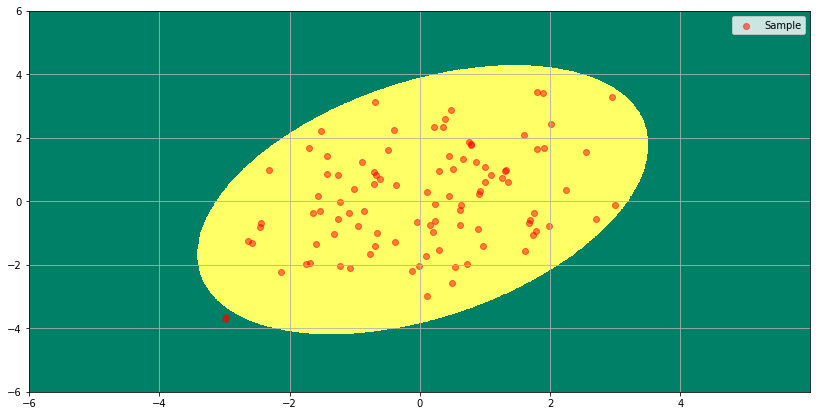

In [268]:
N = 100
ALPHA = 0.95
mean = np.array([0, 0])
cov = np.array([
    [2, 1],
    [1, 3]
])
cov_inversed = inv(cov) # sp.linalg

mgrid = np.mgrid[-6:6:0.01, -6:6:0.01]
grid = np.empty(mgrid[0].shape + (2,))
grid[:, :, 0] = mgrid[0]
grid[:, :, 1] = mgrid[1]

z = sps.chi2(df=2).ppf(ALPHA)
X = sps.multivariate_normal(mean, cov).rvs(size=N)
X_mean = X.mean(axis=0)

def check(x):
    h = X_mean - x
    return (h.T @ cov_inversed @ h) < z

CI = np.array([
    [1 if check(grid[x, y]) else 0 for y in range(grid.shape[1])]
    for x in range(grid.shape[0])
])
print(grid.shape)
print(CI.shape)
plt.figure(figsize=(14,7))
plt.pcolormesh(mgrid[0], mgrid[1], CI, label="Confidence interval", cmap='summer')
plt.scatter(X[:,0], X[:,1], alpha=0.5, color="red", label="Sample")
plt.legend()
plt.grid()
plt.show()

** Вывод **: Аналогично 1

**Задача 4.** 
При использовании асимптотических доверительных интервалов важно понимать, какой размер выборки является достаточным для 
хорошего приближения. Иначе говоря, пусть $\xi_n \xrightarrow{d} \mathcal{N}(0, 1)$. Начиная с какого $n$ распределение статистики $\xi_n$ хорошо приближается нормальным распределением?

Для ответа на этот вопрос проведите следующее исследование. Сгенерируйте $K=10^5$ выборок $(X_{i,k},\ i \leqslant N)$ размера $N=300$, где $k \leqslant K$ --- номер выборки. Для каждой подвыборки $k$-ой выборки $(X_{i,k},\ i \leqslant n)$ посчитайте значение статистики $T_{n,k}$ (определение далее) для всех $n \leqslant N$. Далее для каждого фиксированного $n$ постройте эмпирическую функцию распределения $F_n^*$ по выборке $(T_{n,k}, k \leqslant K)$ и посчитайте точное значение статистики $D_n = \sup\limits_{x \in \mathbb{R}} \left| F_n^*(x) - F(x) \right|,$ где $F$ --- функция распределения $\mathcal{N}(0, 1)$ (см. задачу 4 задания 1). Постройте график зависимости $D_n$ от $n$.

Рассмотрите следующие случаи
* $X_1, ..., X_n \sim \mathcal{N}(0, 1)$. Рассмотреть $T = \sqrt{n} \cdot \overline{X}$ и $T = \sqrt{n} \cdot \overline{X} \left/ \sqrt{S^2} \right.$.
* $X_1, ..., X_n \sim Bern(p), p = 0.5$. Рассмотреть $T = \sqrt{n} \frac{\overline{X} - p}{\sqrt{p(1-p)}}$ и $T_n = \sqrt{n} \frac{\overline{X} - p}{\sqrt{S^2}}$.
* $X_1, ..., X_n \sim Cauchy$. Рассмотреть $T = \sqrt{n} \frac{\widehat{\mu}}{\pi/2}$.

В первых двух пунктах нужно построить две зависимости на одном графике для сравнения. Масштаб графика должен быть таким, чтобы четко можно было увидеть различие между двумя статистиками. Например, поставьте ограничение сверху по оси $y$ на 0.05. Незабудьте добавить сетку и легенду.

Старайтесь не копировать много кода, пишите вспомогательные функции. Обратите внимание, что оптимальный код для первых двух пунктов выполняется за 30 секунд, для третьего --- за 3 минуты. Неоптимальный код может выполняться более часа.

Сделайте вывод о том, в каком случае распределение статистики быстрее приближается нормальным распределением. Начиная с какого размера выборки можно пользоваться приближением нормальным распределением?

In [278]:
K = int(1e5)
N = 300

def sup(X, ecdf, cdf):
    Xn = X[:]
    Xn = np.sort(Xn)
    minimum = Xn[0]
    maximum = Xn[-1]
    Xl = np.concatenate((np.array([minimum - 1.]), Xn))
    Xr = np.concatenate((Xn, np.array([maximum + 1.])))
    
    # так мы без циклов вычислили минимальное расстояние между соседними точками
    minDistance = (Xr - Xl).min()
    radius = minDistance / 2.

    # value in F*(x - 0) equals F*(x - radius),
    # because F* is constant in (-minDistance, + minDistance)
    return max( # max( sup <F* - F>(x - 0), sup <F* - F> (x + ) )
                (np.abs(ecdf(X - minDistance) - cdf(X))).max(), 
                (np.abs(ecdf(X + minDistance) - cdf(X))).max()  
            ) # we also have checked +-inf

def plot(Dns, ylim=None):
    plt.figure(figsize=(14, 7))
    grid = np.arange(1, Dns[0].size + 1)
    
    for i, Dn in enumerate(Dns):
        plt.plot(grid, Dn, label=r"$D_{n}$, T = $T_{%d}$"%(i+1))

    if (not (ylim is None)):
        plt.ylim(ylim)
        
    plt.xlabel("n")
    plt.ylabel("D_n")
    plt.grid()
    plt.legend()
    plt.show()

* $X_1, ..., X_n \sim \mathcal{N}(0, 1)$. Рассмотреть $T = \sqrt{n} \cdot \overline{X}$ и $T = \sqrt{n} \cdot \overline{X} \left/ \sqrt{S^2} \right.$.

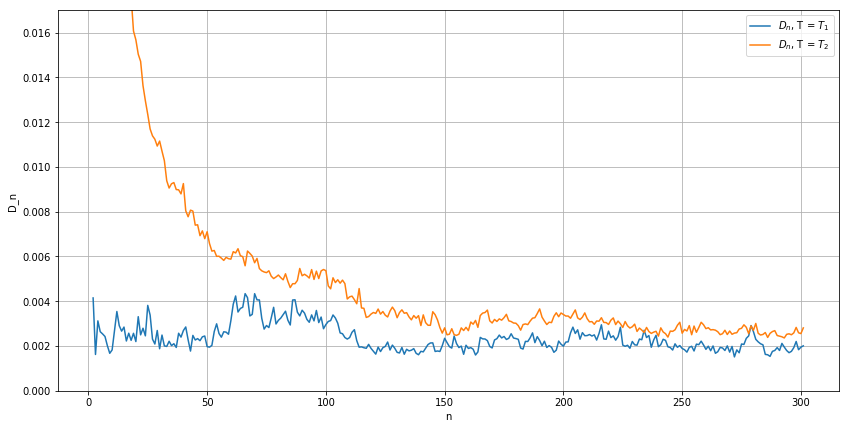

CPU times: user 1min 27s, sys: 7.38 s, total: 1min 34s
Wall time: 1min 47s


In [272]:
%%time
X = sps.norm.rvs(size=(N, K))
Dn1 = np.full(N + 1, np.NAN)
Dn2 = np.full(N + 1, np.NAN)

for i in range(N):
    cut = X[:i+1]
    mean = cut.mean(axis=0)
    mean2 = (cut**2).mean(axis=0)
    S2 = mean2 - mean ** 2
    T1 = mean * np.sqrt(i + 1)
    Dn1[i + 1] = sup(T1, ECDF(T1), sps.norm().cdf)
    if (S2 > 0).all():
        T2 = mean * np.sqrt(i + 1) / np.sqrt(S2)
        Dn2[i + 1] = sup(T2, ECDF(T2), sps.norm().cdf)
        
plot([Dn1, Dn2], ylim=(0, 0.017))

**Вывод (1 из 3)**: $\forall i : X_i \sim \mathcal{N}(0, 1) \Rightarrow \sqrt{n} \overline{X} = \frac{1}{\sqrt{n}} \sum_{i=1}^{n} X_i \sim \mathcal{N}(0, n \frac{1}{\sqrt{n}^2}) \equiv \mathcal{N}(0,1)$ Значит, первая статистика всегда представляет из себя выборку из $\mathcal{N}(0, 1)$ и увеличение n не даст качественных улучшений $D_n$. Судя по графику, $T_2$ ведёт себя хуже.

* $X_1, ..., X_n \sim Bern(p), p = 0.5$. Рассмотреть $T = \sqrt{n} \frac{\overline{X} - p}{\sqrt{p(1-p)}}$ и $T_n = \sqrt{n} \frac{\overline{X} - p}{\sqrt{S^2}}$.

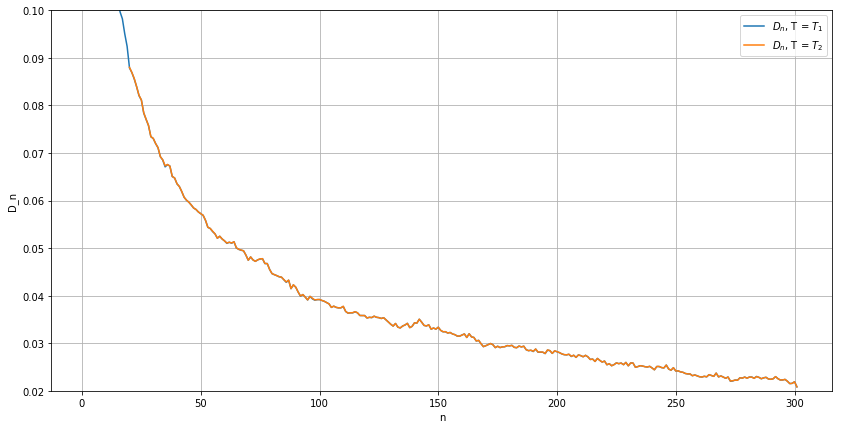

Опустим второй график ниже, чтобы было видно, что их два


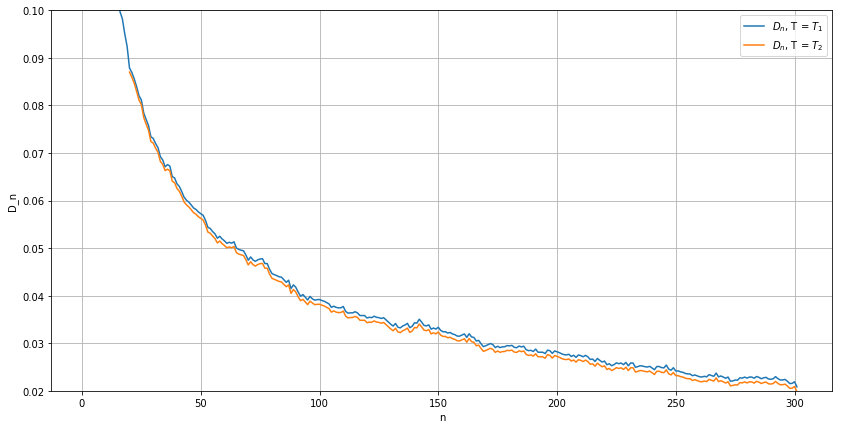

CPU times: user 1min 23s, sys: 9.37 s, total: 1min 32s
Wall time: 1min 31s


In [186]:
%%time
p = 0.5
X = sps.bernoulli(p).rvs(size = (N, K))

Dn1 = np.full(N + 1, np.NAN)
Dn2 = np.full(N + 1, np.NAN)
for i in range(N):
    cut = X[:i+1]
    mean = cut.mean(axis=0)
    mean2 = (cut**2).mean(axis=0)
    S2 = mean2 - mean ** 2
    T0 = np.sqrt(i + 1) * (mean - p)
    T1 = T0 / np.sqrt(p * (1. - p))
    Dn1[i + 1] = sup(T1, ECDF(T1), sps.norm().cdf)
    if (S2 > 0).all():
        T2 = T0 / np.sqrt(S2)
        Dn2[i + 1] = sup(T2, ECDF(T2), sps.norm().cdf)
        
plot([Dn1, Dn2], ylim = (0.02, 0.1))
print("Опустим второй график ниже, чтобы было видно, что их два")
plot([Dn1, Dn2-0.001], ylim = (0.02, 0.1))

** Вывод (2 из 3) **: Методом пристального взгляда понимаем, что первая статистика по ЦПТ, по распределению, стремится к $\mathcal{N}(0,1)$ Значит, увеличение n здесь уместно. Заметим, что оценки отличаются тем, что в первой в знаменателе стоит истинная дисперсия, а во второй - выборочная. Значит, из графика следует, что выборочная и истинная дисперсия отличаются незначительно даже при малых n. эти две статистики почти неотличимы, тем более - в асимптотическом смысле.

* $X_1, ..., X_n \sim Cauchy$. Рассмотреть $T = \sqrt{n} \frac{\widehat{\mu}}{\pi/2}$.

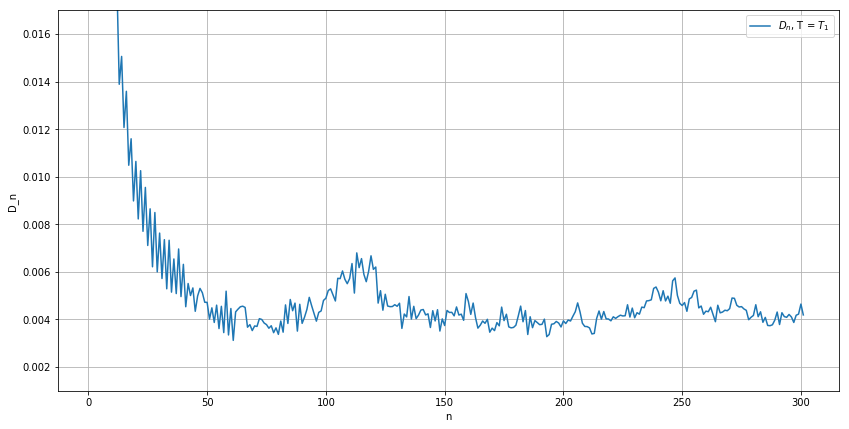

In [192]:
X = sps.cauchy.rvs(size = (N, K))
Dn1 = np.full(N + 1, np.NAN)
for i in range(N):
    cut = X[:i+1]
    mid = np.median(cut, axis=0)
    T1 = np.sqrt(i + 1) * mid * 2. / np.pi
    Dn1[i + 1] = sup(T1, ECDF(T1), sps.norm.cdf)
plot([Dn1], ylim = (0.001, 0.017))

** Вывод (3 из 3) **: Как уже говорилось, выборочная медиана для Cauchy асимптотически нормальна и данная статистика стремится к $\mathcal{N}(0,1)$

** Вывод **: для статистик выше начиная с выборок размера 50 значение $D_n$ можно оценить сверху как 0.06, т.е. они хорошо приближаются $\mathcal{N}(0, 1)$ при малых размерах выборок, порядка К = 300. Дополнительно отметим, что по теореме Гливенко-Кантелли $D_n \underset{n \rightarrow \inf}{\rightarrow} 0$

**Задача 5<font size="5" color="red">\*</font>.** 
Проведите исследование аналогичное задаче 4 для статистик из задачи 2.

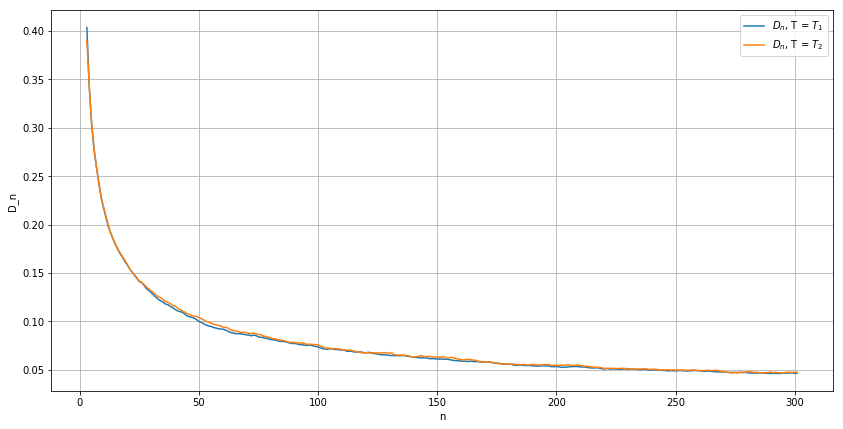

CPU times: user 1min 28s, sys: 12.6 s, total: 1min 40s
Wall time: 1min 40s


In [285]:
%%time
N = 300
K = int(1e5)

theta = 3.
beta = 2.

def Sigma(x, y):
    return x * np.sqrt(beta + theta / y)
def Sigma2(x, y):
    return np.sqrt(2. * y * (y + 1))


X = sps.gamma(a=beta, scale=1./theta).rvs(size=(N,K))
Dn1 = np.full(N + 1, np.NAN)
Dn2 = np.full(N + 1, np.NAN)


for i in range(N):
    cut = X[:i+1]
    mean = cut.mean(axis=0)
    mean2 = (cut**2).mean(axis=0)
    S2 = mean2 - mean ** 2
    if (S2 > 0).all():
        T1 = mean / S2
        T2 = mean ** 2 / S2
        NT1 = np.sqrt(i + 1) * (T1 - theta) / Sigma(T1, T2)
        NT2 = np.sqrt(i + 1) * (T2 - beta) / Sigma2(T1, T2)
        Dn1[i + 1] = sup(NT1, ECDF(NT1), sps.norm().cdf)
        Dn2[i + 1] = sup(NT2, ECDF(NT2), sps.norm().cdf)
        
plot([Dn1, Dn2])

** Вывод **: Как было доказано выше, оценки $\frac{\overline{X}}{S^2}, \frac{\overline{X}^2}{S^2}$ асимптотически нормальны, что видно на графике, впрочем, $D_n$ убывает значительно медленнее, чем было в номере выше. Для $D_n = 0.06$ уже необходимо ~200 элементов выборки.

**Задача 6.** 
Реализуйте следующую функцию для выборки из нормального распределения

In [215]:
def normal_summary(sample):
    size = sample.size
    mean = sample.mean()
    median = np.median(sample)
    std = np.std(sample)
    
    z = sps.norm.ppf(0.95)
    CI = (mean - z * std / np.sqrt(size),
          mean + z * std / np.sqrt(size)) # коментарии - выше в №1
    
    kss = sup(sample, ECDF(sample), sps.norm(loc=mean, scale=std).cdf)
    #kss = sps.kstest(sample, sps.norm(loc=mean, scale=std).cdf).statistic
    #they are equals
    print('size: %d' % size)
    print('sample mean: %.2f' % mean)
    print('sample median: %.2f' % median)
    print('sample std: %.2f' % std)  # стандартное отклонение = корень из дисперсии
    print('0.95 confidence interval: (%.2f, %.2f)' % CI)
    print('KS-stat: %.3f' % (kss))  # значение статистики из теоремы Колмогорова-Смирнова,
                                  # взяв в качестве F функцию распределения нормального
                                  # распределения с оцененными выше параметрами
            
def normal_summary_kss(sample):
    size = sample.size
    mean = sample.mean()
    median = np.median(sample)
    std = np.std(sample)
    
    z = sps.norm.ppf(0.95)
    CI = (mean - z * std / np.sqrt(size),
          mean + z * std / np.sqrt(size)) # коментарии - выше в №1
    
    kss = sup(sample, ECDF(sample), sps.norm(loc=mean, scale=std).cdf)
    #kss = sps.kstest(sample, sps.norm(loc=mean, scale=std).cdf).statistic
    return kss

Протестируйте функцию на выборках из нормального распределения и на выборках из других распределений. Какой вывод можно сделать о поведении статистики Колмогорова-Смирнова?

Скачайте данные http://archive.ics.uci.edu/ml/datasets/Wine, файл `wine.data`.
Что вы можете сказать про столбцы 1, 4, 8 (нумерация с нуля), соответсвующие 'Alcohol', 'Alcalinity of ash', 'Nonflavanoid phenols'?

size: 100000
sample mean: 16.94
sample median: 16.95
sample std: 10.06
0.95 confidence interval: (16.88, 16.99)
KS-stat: 0.003


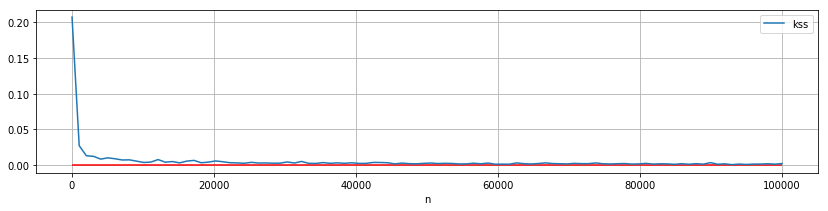

In [233]:
N = int(1e5)
def plot(rvs):
    normal_summary(rvs(size=N))
    plt.figure(figsize=(14,3))
    grid = np.linspace(10, 10**5, 100)
    kssa = [normal_summary_kss(rvs(size=int(N))) for N in grid]
    plt.plot(grid, kssa, label="kss")
    plt.hlines(0, 0, 10**5, color="red")
    plt.grid()
    plt.xlabel("n")
    plt.legend()
    plt.show()
plot(sps.norm(loc=17, scale=10).rvs)

size: 100000
sample mean: 0.50
sample median: 0.50
sample std: 0.29
0.95 confidence interval: (0.50, 0.50)
KS-stat: 0.057


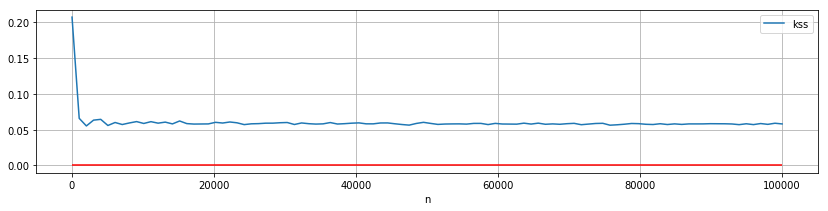

In [234]:
plot(sps.uniform.rvs)

size: 100000
sample mean: 152.93
sample median: 149.85
sample std: 37.11
0.95 confidence interval: (152.73, 153.12)
KS-stat: 0.033


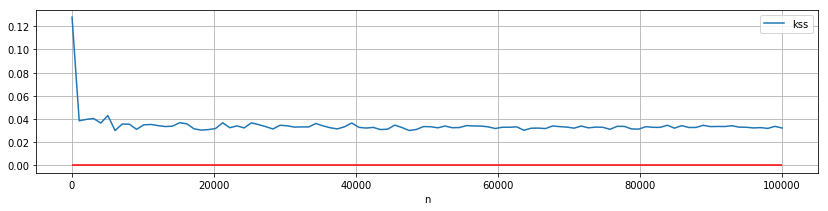

In [235]:
plot(sps.gamma(a=17, scale=9).rvs)

size: 100000
sample mean: 1.00
sample median: 0.69
sample std: 1.00
0.95 confidence interval: (1.00, 1.01)
KS-stat: 0.159


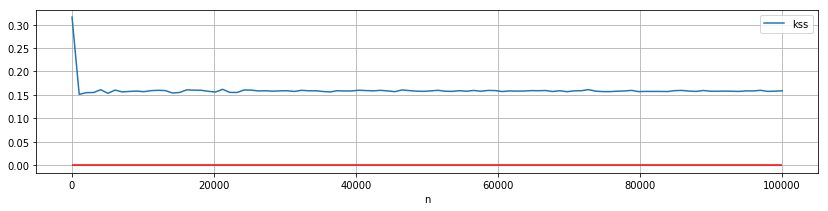

In [236]:
plot(sps.expon.rvs)

** Вывод (1 из 2) **: Из построенных графиков возникает гипотеза, что kss стремится к нулю для нормального распредления и не стремится к нулю для остальных. Т.к значение kss суть есть максимальное расстояние между графиками эмпирисечкой и реальной функцией распределения, то его можно применять для определения распределения выборки.

In [240]:
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.names

--2017-05-14 03:16:21--  http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data
Распознаётся archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.249
Подключение к archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.249|:80... соединение установлено.
HTTP-запрос отправлен. Ожидание ответа... 200 OK
Длина: 10782 (11K) [text/plain]
Сохранение в каталог: ««wine.data.1»».

wine.data.1         100%[===================>]  10,53K  --.-KB/s    in 0,001s  

2017-05-14 03:16:21 (9,19 MB/s) - «wine.data.1» сохранён [10782/10782]

--2017-05-14 03:16:21--  http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.names
Распознаётся archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.249
Подключение к archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.249|:80... соединение установлено.
HTTP-запрос отправлен. Ожидание ответа... 200 OK
Длина: 3036 (3,0K) [text/plain]
Сохранение в каталог: ««wine.names»».

wine.names          100%[===================>]   2,96K  --.-K

In [253]:
names = ["Alcohol", # copy-pasted from *.names
         "Malic acid",
         "Ash",
         "Alcalinity of ash",
         "Magnesium",
         "Total phenols",
         "Flavanoids",
         "Nonflavanoid phenols",
         "Proanthocyanins",
         "Color intensity",
         "Hue",
         "OD280/OD315 of diluted wines",
         "Proline"]

In [254]:
data_frame = pd.read_csv('wine.data', names = names, index_col=None)
data_frame

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.640000,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.380000,1.05,3.40,1050
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.680000,1.03,3.17,1185
1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.800000,0.86,3.45,1480
1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.320000,1.04,2.93,735
1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.750000,1.05,2.85,1450
1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.250000,1.02,3.58,1290
1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.050000,1.06,3.58,1295
1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.200000,1.08,2.85,1045
1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.220000,1.01,3.55,1045


In [259]:
def normal_summary_kss_pvalue(sample):
    size = sample.size
    mean = sample.mean()
    median = np.median(sample)
    std = np.std(sample)
    
    z = sps.norm.ppf(0.95)
    CI = (mean - z * std / np.sqrt(size),
          mean + z * std / np.sqrt(size)) # коментарии - выше в №1
    
    # kss = sup(sample, ECDF(sample), sps.norm(loc=mean, scale=std).cdf)
    kss = sps.kstest(sample, sps.norm(loc=mean, scale=std).cdf).pvalue
    print("pvalue:", kss)

def normal_summary_pro(sample):
    normal_summary(sample)
    normal_summary_kss_pvalue(sample)
    

normal_summary_pro(data_frame["Alcohol"].values)
print("__________")
normal_summary_pro(data_frame["Alcalinity of ash"].values)
print("__________")
normal_summary_pro(data_frame["Nonflavanoid phenols"].values)

size: 178
sample mean: 13.00
sample median: 13.05
sample std: 0.81
0.95 confidence interval: (12.90, 13.10)
KS-stat: 0.069
pvalue: 0.358902722669
__________
size: 178
sample mean: 19.49
sample median: 19.50
sample std: 3.33
0.95 confidence interval: (19.08, 19.91)
KS-stat: 0.063
pvalue: 0.46021602825
__________
size: 178
sample mean: 0.36
sample median: 0.34
sample std: 0.12
0.95 confidence interval: (0.35, 0.38)
KS-stat: 0.115
pvalue: 0.016325554288


**Вывод (2 из 2)**: пользуясь полученным "критерием" нормальности, можно утверждать, что первые два распределения, скорее всего, нормальны, а третье - вряд ли. 

Однако, можно использовать sps.kstest, который умеет считать pvalue для критерия Колмогорова-Смирнова (вроде бы это вероятность, с которой выборка удовлетворяет нормальному распределению и при данных (>0.05) значениях в первых двух выборках имеет место гипотеза о нормальность, а в последнем - нет, но я точно не разобрался, что, впрочем, и не требовалось)

### 2. Байесовские методы

**Задача 7.** Пусть $X_1, ..., X_n \sim \mathcal{N}(\theta, 1)$ и $\theta$ имеет априорное распределение Коши. Как было сказано на лекции, аналитически интеграл в знаменателе формулы Байеса посчитать не удастся. Однако, поскольку в данном случае параметр один, можно его посчитать с помощью приближенного интегрирования.

В качестве метода приближенного интегрирования можно использовать следующую модификацию известного метода Монте-Карло. В качестве оценки интеграла $\int\limits_{\mathbb{R}} f(x) p(x) dx$, где $p(x)$ --- некоторая плотность, можно взять величину $\sum\limits_{j=1}^k f(Y_i)$, где $Y_1, ..., Y_k$ --- сгенерированная выборка из распределения, имеющего плотность $p(x)$.

Сгенерируйте выборку размера 5 из стандартного нормального распределения. Посчитайте для нее $c$ --- знаменатель в формуле Байеса. Какой размер вспомогательной выборки в методе приближенного интегрирования необходим, чтобы с большой точностью посчитать значение $c$?

Нарисуйте график плотности апостериорного распределения. Посчитайте математическое ожидание по апостериорному распределению.

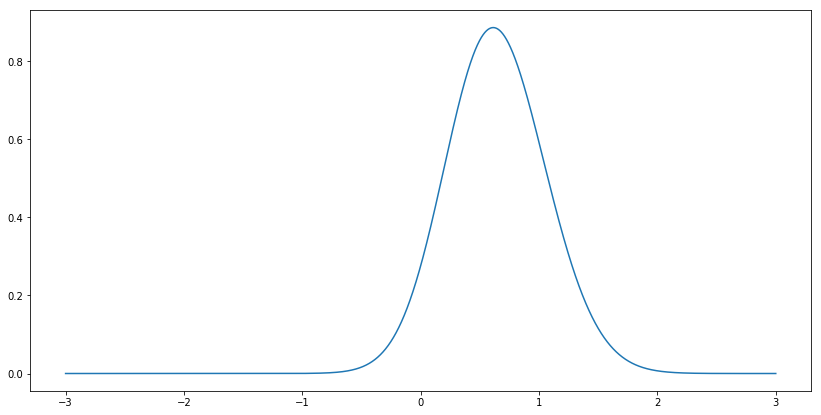

In [52]:
N = 5
X = sps.norm.rvs(size=N)
F = lambda t: (2 * np.pi) ** (-len(X) / 2.) * np.exp(-0.5 * np.sum((X - t) ** 2))

M = 1000
Y = sps.cauchy.rvs(size=M)
vect_F = np.vectorize(F)
grid = np.arange(1, 1 + Y.size)
I = np.sum(vect_F(Y)) / grid[-1] # == C

grid = np.linspace(-3, +3, 10000)
aposter = (vect_F(grid) * sps.cauchy.pdf(grid) / I)
plt.figure(figsize=(14,7))
plt.plot(grid, aposter)
plt.show()

Матожидание распределения, имеющего апостериорную плотность $\frac{f(x)p(x)}{c}$  найдём аналогично, методом Монте-Карло.

$$E x = \int_\limits{-\inf}^{+\inf}\frac{xf(x)p(x)}{c} = \frac{1}{ck} \sum_{i=1}^{k} Y_i f(Y_i)$$

In [53]:
E = (Y * vect_F(Y)).sum() / (C * M)
print(E)

0.0866588485442


** Вывод **: метод Монте-Карло помогает вычислить интеграл численно, на таком размерах выборок результат достаточно нестабильный.



**Задача 8.** Рассмотрим схему испытаний Бернулли (т.е. броски монет) с вероятностью успеха $p$. 

Постройте несколько графиков сопряженного распределения для разных параметров и охарактеризуйте, как значения параметров его соотносятся с априорными знаниями о монете.
Это могут быть, например, знания вида 
* монета скорее честная (при таком априорном распределении наиболее вероятны значения $p$ в окрестности 0.5)
* монета скорее нечестная, перевес неизвестен (наименее вероятны значения $p$ в окрестности 0.5)
* монета скорее нечестная, перевес в сторону герба (наиболее вероятны значения $p$ в окрестности 1)
* монета скорее честная, либо с небольшим перекосом вправо (наиболее вероятны значения $p$ в окрестности ~0.6)
* ничего не известно (все значения равновероятны)

Для каждого случая из перечисленных выше постройте график плотности сопряженного распределения (на одной фигуре).

* В "методичке" есть доказательство того, что Бета-распределение является сопряжённым к распределению Бернулли. Тогда пложим априорным распределением $p \sim B(\lambda_1, \lambda_2)$. Получим апостериорное распределение $B(\sum X_i + \lambda_1, n - \sum X_i + \lambda_2)$

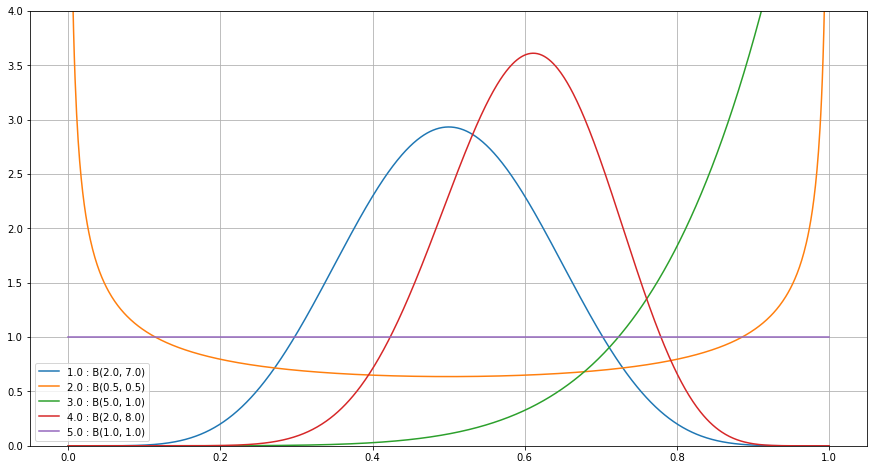

In [109]:
grid = np.linspace(0, 1, 1000)
ARGS = np.array([
    [7., 7.],
    [0.5, 0.5],
    [7., 1.],
    [12., 8],
    [1., 1.]
])

plt.figure(figsize=(15, 8))
for i in range(ARGS.shape[0]):
    plt.plot(grid, sps.beta(*ARGS[i]).pdf(grid),
            label="%.1f : B(%.1f, %.1f)" % (i + 1, args[i][0], ARGS[i][1]))
plt.legend()
plt.ylim((0, 4))
plt.grid()
plt.show()

Ниже приведена реализация некоторых вспомогательных функций.)

In [110]:
def draw_posteriori(grid, distr_class, post_params, ylim=None):
    ''' Рисует серию графиков апостериорных плотностей.
        grid --- сетка для построения графика
        distr_class --- класс распределений из scipy.stats
        post_params --- параметры апостериорных распределений 
                        shape=(размер выборки, кол-во параметров)
    '''
    
    size = post_params.shape[0] - 1
    
    plt.figure(figsize=(12, 7))
    for n in range(size+1):
        plt.plot(grid, 
                 distr_class(post_params[n]).pdf(grid) if np.isscalar(post_params[n]) 
                 else distr_class(*post_params[n]).pdf(grid), 
                 label='n={}: {}'.format(n, post_params[n]), 
                 lw=2.5,
                 color=(1-n/size, n/size, 0))
    plt.grid(ls=':')
    plt.legend()
    plt.ylim(ylim)
    plt.show()
    

def draw_estimations(ml, distr_class, post_params, confint=True, ylim=None):
    ''' Рисует графики байесовской оценки (м.о. и дов. инт.) и ОМП.
        ml --- Оценка максимального правдоподобия для 1 <= n <= len(sample)
        distr_class --- класс распределений из scipy.stats
        post_params --- параметры апостериорных распределений 
                        shape=(размер выборки, кол-во параметров)
    '''
    
    size = len(ml)
    distrs = []
    for n in range(size+1): 
        distrs.append(distr_class(post_params[n]) if np.isscalar(post_params[n]) 
                      else distr_class(*post_params[n]))
    
    plt.figure(figsize=(12, 4))
    plt.plot(np.arange(size+1), [d.mean() for d in distrs], label='Bayes', lw=1.5)
    plt.fill_between(np.arange(size+1), [d.ppf(0.975) for d in distrs], 
                     [d.ppf(0.025) for d in distrs], alpha=0.1)
    plt.plot(np.arange(size)+1, ml, label='ML', lw=1.5)
    plt.grid(ls=':')
    plt.ylim(ylim)
    plt.legend()
    plt.show()

Реализуйте следующую функцию

In [111]:
def bern_posterior_params(sample, a, b):
    ''' Возвращает параметры апостериорного распределения для всех 0 <= n <= len(sample).
        a, b --- параметры априорного распределения.
    '''
    params = np.array(
        [np.array([a + np.sum(sample[:n]), b + len(sample[:n]) - np.sum(sample[:n])])
         for n in range(len(sample) + 1)]
    )
    return params

Проведите по 15 бросков симметричной и несимметричной монет (можно сгенерировать) и рассмотрите для каждой из них два случая --- параметры априорного распределения подобраны правильно или неправильно.
Постройте графики, воспользовавшись функциями `draw_posteriori` и `draw_estimations`.

Сделайте вывод. Что можно сказать про зависимость от параметров априорного распределения? Сравните байесовские оценки с оценкой максимального правдоподобия.

In [122]:
Throws = 15

def plot(p, a, b, ylim=None):
    X = sps.bernoulli(p).rvs(size=Throws)
    grid = np.linspace(0, 1, 1000)
    params = bern_posterior_params(X, a, b)
    draw_posteriori(grid, sps.beta, params, ylim=ylim)
    likelihood = X.cumsum() / np.arange(1, 1 + X.size)
    draw_estimations(likelihood, sps.beta, params)
    

* Симметричная, верные параметры

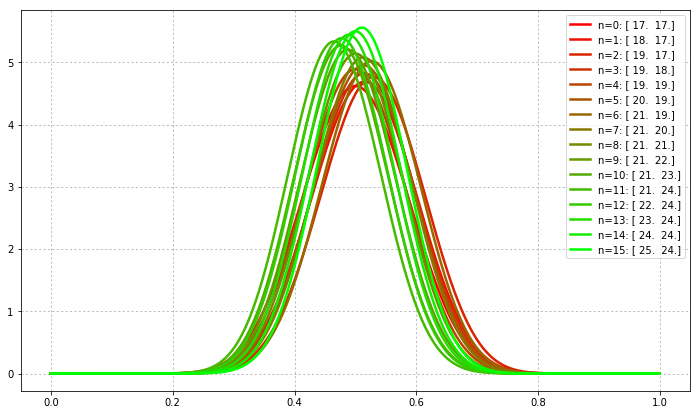

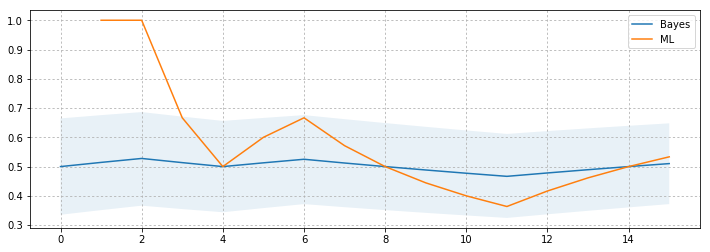

In [123]:
plot(p=0.5, a=17., b=17.)

* Симметричная, ошибочные параметры

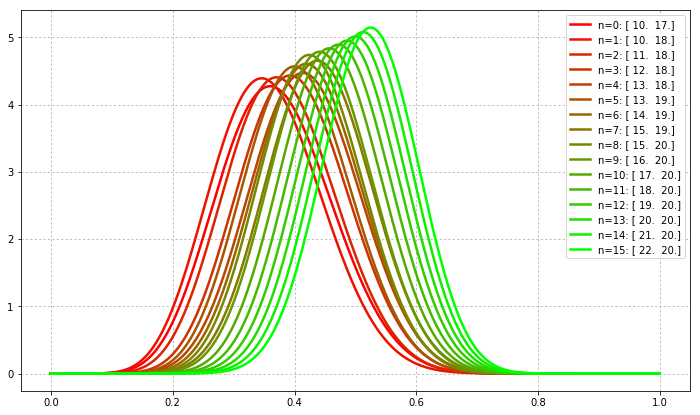

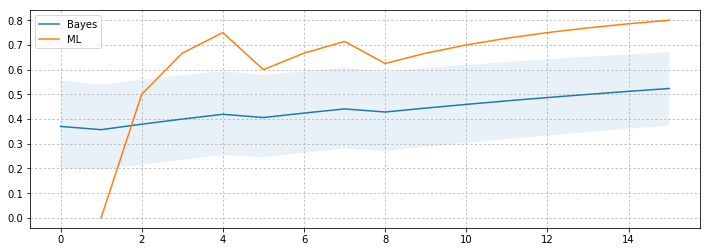

In [124]:
plot(p=0.5, a=10., b=17.)

* Несимметричная, верные параметры

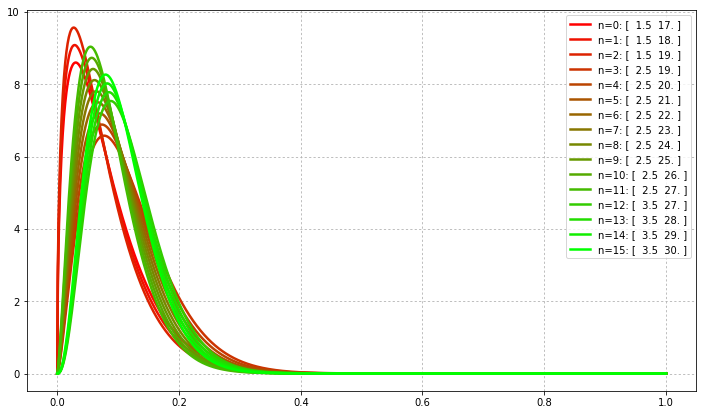

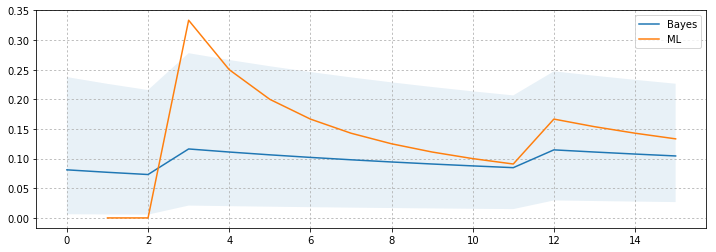

In [130]:
plot(p=0.1, a=1.5, b=17.)

* Не симметричная, не верные

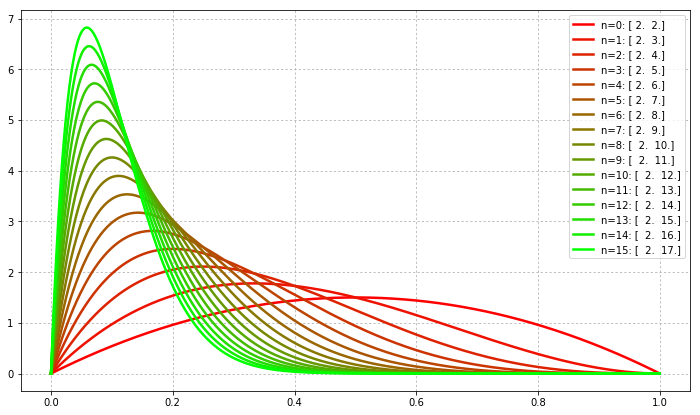

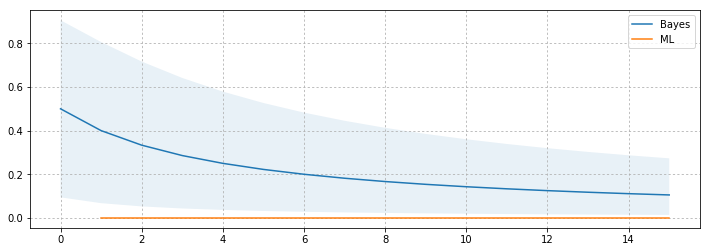

In [131]:
plot(p=0.1, a=2., b=2.)

** Вывод **: Нужно правильно подбирать параметры, максимизируя обоснованность. При правильно подобранных параметрах априорного распределения апостериорная плотность изменяется слабо. 

Байесовская оценка лучше на выборках малого размера, в сравнении с ОМП.

**Задача 9<font size="5" color="red">\*</font>.** 
Один экзаменатор на экзамене по теории вероятностей при выставлении оценки студенту пользуется следующей схемой. В течении экзамена экзаменатор задает студенту некоторое количество вопросов, получая тем самым выборку $X_1, ..., X_n \sim Bern(p)$ --- индикаторы того, что студент на вопрос ответил правильно.
При этом сначала он подбирает некоторое априорное распределение на основе его знаний о студенте к моменту начала ответа. После каждого ответа студента экзаменатор вычисляет апостериорное распределение и строит байесовский доверительный интервал для $p$ уровня доверия 0.95. Если после очередного ответа студента доверительный интервал содержит лишь одно число $i/10$, где $i \in \{0, ..., 10\}$, то экзаменатор выставляет студенту оценку $i+1$.

Ответьте на следующие вопросы:
* Квантили какого уровня нужно выбирать экзаменатору при построении доверительного интервала, чтобы задавать студенту как можно меньше вопросов? Какие оценки будет выставлять экзаменатор в таком случае?
* Как зависит оценка студента и среднее количество заданных вопросов у различных студентов (по уровню знаний) при различных априорных представлений экзаметора?
* Нужно ли дружить с таким экзаменатором?

**Задача 10.** Проведите исследование, аналогичное задаче 8 для выборок из распределений
* $\mathcal{N}(\theta, 1)$
* $Exp(\theta)$

# $\mathcal{N}(\theta, 1)$

Нормальное распределение является сопряжённым к $\mathcal{N}(\theta, 1)$
Апостериорное распределение $\theta$ (задача 14.6 из "методички" или из вики):

$\mathcal{N}(\frac{\sigma^2 \sum X_i + \mu}{\sigma^2 n + 1}, \frac{\sigma^2}{\sigma^2 n + 1})$, где $\mathcal{N}(\mu, \sigma^2)$ - апостериорное распределение $\theta$.

In [133]:
def norm_posterior_params(sample, mu, sig2):
    ''' Возвращает параметры апостериорного распределения для всех 0 <= n <= len(sample).
        a, b --- параметры априорного распределения.
    '''
    params = np.array(
        [np.array([ (mu + np.sum(sample[:n]) * sig2)/(1. + sig2*n),
                    (sig2 / (1. + n * sig2)) ])
         for n in range(len(sample) + 1)]
    )
    
    return params

In [151]:
def plot(N, loc, scale, mu, sig2):
    X = sps.norm(loc=loc, scale=scale).rvs(size=N)
    grid = np.linspace(loc - 6, loc + 6, 1000)
    params = norm_posterior_params(X, mu, sig2);
    draw_posteriori(grid, sps.norm, params)
    likelihood = np.cumsum(X) / np.arange(1, len(X) + 1)
    draw_estimations(likelihood, sps.norm, params)

* параметры верные, $\theta = 0$

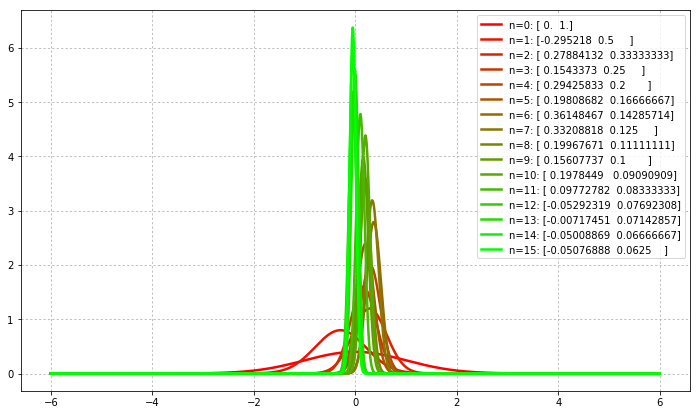

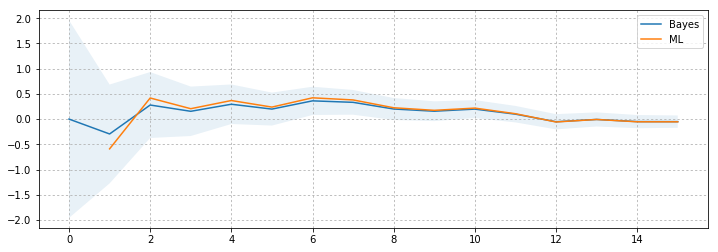

In [152]:
plot(15, 0, 1, 0, 1)

* параметры близки, $\theta = 7$

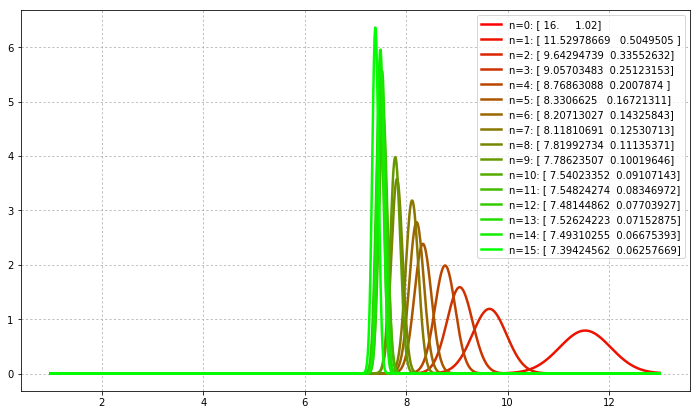

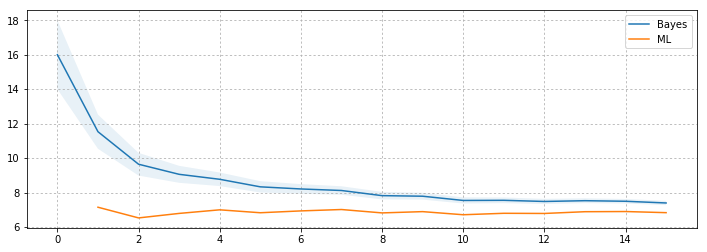

In [153]:
plot(15, 7, 1, 16, 1.02)

* параметры далеки, $\theta = 0$

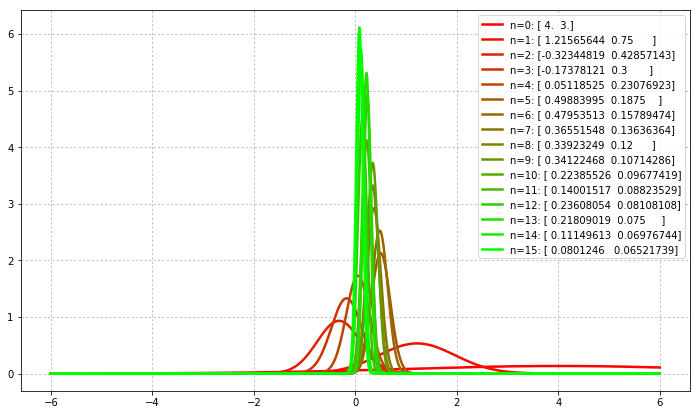

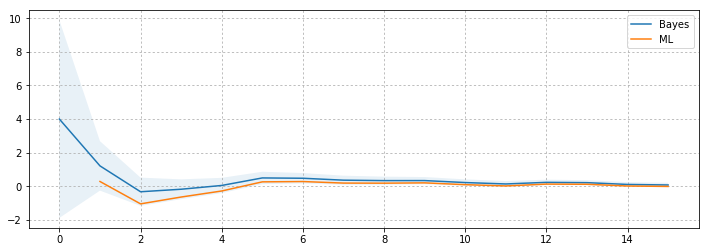

In [154]:
plot(15, 0, 1, 4, 3)

# $Exp(\theta)$

Из методички узнаём, что семейство $\Gamma(\alpha, \beta)$ является сопряжённым к $Exp(\theta)$
Апостериорное распределение $\theta$ есть $\theta$ есть $\Gamma(\alpha + \sum X_i, \beta + \sum X_i)$, где $\Gamma(\alpha, \beta)$ - априорное распределение $\theta$

Примечание: $\Gamma(\alpha, \beta) \equiv$ sps.gamma($\beta, 0, 1/\alpha$)

In [156]:
def exp_posterior_params(X, a, b):
    ''' Возвращает параметры апостериорного распределения для всех 0 <= n <= len(sample).
        a, b --- параметры априорного распределения.
    '''
    params = np.array(
        [np.array([b + n,
                   0,
                   1. / (a + np.sum(X[:n]))])
         for n in range(len(X) + 1)]
    )
    
    return params

In [167]:
def plot(size, a, b):
    X = sps.expon.rvs(size=size)
    grid = np.linspace(0, 7, 1000)
    params = exp_posterior_params(X, a, b)
    draw_posteriori(grid, sps.gamma, params)
    likelihood = np.arange(1, len(X) + 1) / np.cumsum(X)
    draw_estimations(likelihood, sps.gamma, params)

* стандартное экспоненциальное, параметры близкие
($\forall i : X_i \sim Exp(\lambda) \Rightarrow \sum_{i=1}^{n} X_i \sim \Gamma(\frac{1}{\lambda}, n)$)

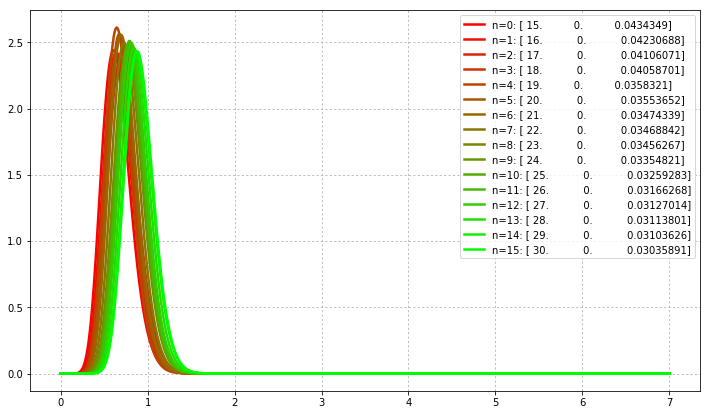

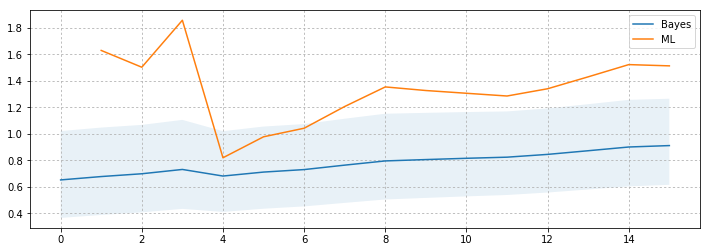

In [168]:
plot(15, (sps.expon.rvs(size=15)).sum(), 15)

* стандартное экспоненциально, параметры далёкие

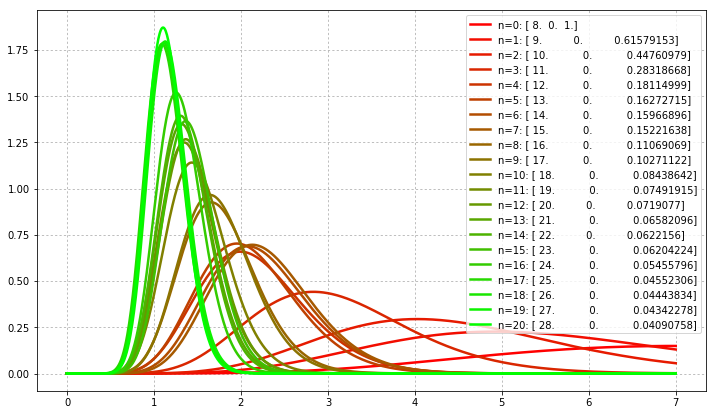

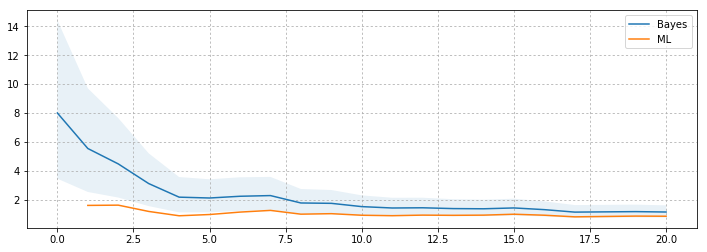

In [176]:
plot(20, 1, 8)

** Вывод **: Аналогичен задаче 8. Байесовский метод хорошо работает на малых выборках, однако нужно выбирать точно (гипер)параметры

**Задача 11<font size="5" color="red">\*</font>.** Проведите исследование, аналогичное задаче 8 для выборки из распределения $\mathcal{N}(\theta_1, \theta_2^{-1})$.
